<a href="https://colab.research.google.com/github/danylo-miranda/Fuel-Reports/blob/main/analise_exploratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Imgur](https://i.imgur.com/kJM6TZl.png)
#Projeto Fuel Reports
---

#<font color = bluelight> Análise exploratória relacionada à série histórica de preço de venda da gasolina e do etanol.

## <font color = bluelight>1.Sobre a Empresa

Esse projeto foi solicitado pela Agência Nacional de Petróleo e Gás
Natural e Biocombustíveis (ANP) e visa a realização de uma análise exploratória
relacionada à série histórica de preço de venda da gasolina e do etanol.

![Imgur](https://i.imgur.com/vpCTyKv.jpg)

A ANP é um centro de referência em dados e informações sobre a indústria de
petróleo e gás natural no Brasil, que mantém o Banco de Dados de Exploração e
Produção (BDEP); divulga as estatísticas oficiais sobre reservas, refino e produção
de petróleo, gás e biocombustíveis no Brasil; realiza e divulga pesquisas sobre
qualidade dos combustíveis e lubrificantes e sobre o comportamento dos preços
desses produtos; promove estudos sobre o potencial petrolífero e o
desenvolvimento do setor; entre outras atividades.
- Natureza:	Agência Reguladora, Autarquia
- Jurídica: Especial, Administrativamente Independente, Financeiramente Autônoma
- Atribuições:	Regulação do Petróleo, Gás Natural e Biocombustíveis
- Dependência:	Governo do Brasil
- Chefia:	Décio Oddone, diretor-geral
- Criação: 	14 de janeiro de 1998


#### <font color = bluelight>1.1. Objetivos do Projeto
  - Realizar a análise exploratória a partir das fontes de dados disponíveis no portal gov.br.
  - Serão utilizados os arquivos dos dois últimos meses do ano atual (Etanol Hidratado + Gasolina C)
  - Série histórica dos preços dagasolina e do etanol em todo o Brasil
  - Análise descritiva das características dos dados, registros, tipos de dados e valores;
  - Limpar e tratar os dados;
  - Utilizar e visualizar gráficos com o objetivo de obter  insights.
  ---

#### <font color = bluelight>1.2. Perguntas a serem resolvidas
- Como se comportaram o preço dos combustíveis durante os dois meses citados? Os valores do
etanol e da gasolina tiveram uma tendência de alta ou diminuição?
-  Qual o preço médio da gasolina e do etanol nesses dois meses?
- Quais os 5 estados com o preço médio da gasolina e do etanol mais caros?
-  Qual o preço médio da gasolina e do etanol por estado?
-  Qual o município que possui o menor preço para a gasolina e para o etanol?
- Qual o município que possui o maior preço para a gasolina e para o etanol?
- Qual a região que possui o maior valor médio da gasolina?
- Qual a região que possui o menor valor médio do etanol?
- Há alguma correlação entre o valor do combustível (gasolina e etanol) e a região onde ele é vendido?
- Há alguma correlação entre o valor do combustível (gasolina e etanol) e a bandeira que vende ele?

---
## <font color = bluelight>2. Conhecendo os Dados:
Nesta etapa do projeto vamos entender os dados iniciais, suas características, registros, tipos e valores, aplicando uma análise com as estatísticas descritivas.

#### <font color = bluelight>2.1.Coletando os dados iníciais
   - As fontes de dados estão disponíveis no portal gov.br. Serão utilizados os arquivos dos dois últimos meses do ano atual (Etanol Hidratado + Gasolina C) link encontra se disponível abaixo.
  -  Link [Serie historica do preço dos combustiveis ](https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/serie-historica-de-precos-de-combustiveis)
  - Estão sendo utilizados os meses de Maio/2023 e Junho/2023

--> Instalando biblioteca usadas para gerar gráficos de mapas coropléticos

In [ ]:
!pip install matplotlib geopandas geobr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 928.1/928.1 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 26.3 MB/s eta 0:00:00
  Attempting uninstall: shapely
    Found existing installation: shapely 2.0.1
    Uninstalling shapely-2.0.1:
      Successfully uninstalled shapely-2.0.1
  Attempting uninstall: geopandas
    Found existing installation: geopandas 0.13.2
    Uninstalling geopandas-0.13.2:
      Successfully uninstalled geopandas-0.13.2


In [ ]:
!pip install matplotlib-venn

In [ ]:
!pip install descartes

-->  Importação de pacotes de bibliotecas que serão utilizados no projeto bem como suas versões:

In [ ]:
# Pacotes de bibliotecas que serão usadas no projeto:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.ticker as ticker
import geobr


# versões dos pacotes:
print('Pacotes Instalados! Versões Utilizadas:\n')
print(f'Pandas      --> {pd.__version__}')
print(f'Numpy       --> {np.__version__}')
print(f'Matplotlib  --> {matplotlib.__version__}')
print(f'Geopandas   --> {gpd.__version__}')

Pacotes Instalados! Versões Utilizadas:

Pandas      --> 1.5.3
Numpy       --> 1.23.5
Matplotlib  --> 3.7.1
Geopandas   --> 0.7.0


---

--> Carregando a base de dados do mês de Junho/2023

In [ ]:
# url Para baixar o arquivo
url = 'https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2023/precos-gasolina-etanol-06.csv'
junho = pd.read_csv(url, sep=';')
junho

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,NE,BA,IRECE,IRECE DERIVADOS DE PETROLEO LTDA,09.186.976/0001-75,PRACA AIRTON SENNA,285,TERREO,CENTRO,44900-000,ETANOL,01/06/2023,"4,31",NaN,R$ / litro,VIBRA ENERGIA
1,NE,BA,IRECE,IRECE DERIVADOS DE PETROLEO LTDA,09.186.976/0001-75,PRACA AIRTON SENNA,285,TERREO,CENTRO,44900-000,GASOLINA,01/06/2023,"5,39",NaN,R$ / litro,VIBRA ENERGIA
2,NE,BA,SIMOES FILHO,CORESFIL COMERCIO REVENDEDOR DE COMBUSTIVEIS LTDA,13.018.536/0003-48,AVENIDA WASHINGTON LUIZ,169,NaN,CENTRO,43700-000,ETANOL,01/06/2023,"4,19",NaN,R$ / litro,VIBRA ENERGIA
3,NE,BA,SIMOES FILHO,CORESFIL COMERCIO REVENDEDOR DE COMBUSTIVEIS LTDA,13.018.536/0003-48,AVENIDA WASHINGTON LUIZ,169,NaN,CENTRO,43700-000,GASOLINA ADITIVADA,01/06/2023,"5,36",NaN,R$ / litro,VIBRA ENERGIA
4,NE,BA,SIMOES FILHO,CORESFIL COMERCIO REVENDEDOR DE COMBUSTIVEIS LTDA,13.018.536/0003-48,AVENIDA WASHINGTON LUIZ,169,NaN,CENTRO,43700-000,GASOLINA,01/06/2023,"5,29",NaN,R$ / litro,VIBRA ENERGIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49036,NE,BA,CAMACARI,POSTO DE COMBUSTIVEIS BUSCA VIDA LTDA,28.315.993/0001-00,RUA C,27,LOTEAMENTO JARDIM FL AMBOYANTS,VILA DE ABRANTES,42840-000,GASOLINA,30/06/2023,"5,64",NaN,R$ / litro,BRANCA
49037,NE,BA,CAMACARI,YEMANJA COMERCIO DE DERIVADOS DE PETROLEO E SE...,04.909.369/0002-53,ESTRADA DA CASCALHEIRA,S/N,BA 531 KM 3 5 ...,PARQUE REAL SERRA VERDE,42813-080,ETANOL,30/06/2023,"4,44",NaN,R$ / litro,BRANCA
49038,NE,BA,CAMACARI,YEMANJA COMERCIO DE DERIVADOS DE PETROLEO E SE...,04.909.369/0002-53,ESTRADA DA CASCALHEIRA,S/N,BA 531 KM 3 5 ...,PARQUE REAL SERRA VERDE,42813-080,GASOLINA ADITIVADA,30/06/2023,"5,64",NaN,R$ / litro,BRANCA
49039,NE,BA,CAMACARI,YEMANJA COMERCIO DE DERIVADOS DE PETROLEO E SE...,04.909.369/0002-53,ESTRADA DA CASCALHEIRA,S/N,BA 531 KM 3 5 ...,PARQUE REAL SERRA VERDE,42813-080,GASOLINA,30/06/2023,"5,64",NaN,R$ / litro,BRANCA


---

--> Carregando a base de dados do mês de Maio/2023

In [ ]:
# url Para baixar o arquivo
url2 = 'https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2023/precos-gasolina-etanol-05.csv'
maio = pd.read_csv(url2, sep=';')
maio

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,SE,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,00.003.188/0001-21,RUA HUMBERTO DE CAMPOS,306,NaN,JARDIM ZULMIRA,18061-000,ETANOL,01/05/2023,"3,79",NaN,R$ / litro,BRANCA
1,SE,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,00.003.188/0001-21,RUA HUMBERTO DE CAMPOS,306,NaN,JARDIM ZULMIRA,18061-000,GASOLINA,01/05/2023,"4,69",NaN,R$ / litro,BRANCA
2,N,AC,CRUZEIRO DO SUL,AMAZONIA COMERCIO DE DERIVADOS DE PETROLEO LTDA,01.492.748/0003-83,AVENIDA COPACABANA,440,NaN,COPACABANA,69980-000,ETANOL,01/05/2023,"5,49",NaN,R$ / litro,IPIRANGA
3,N,AC,CRUZEIRO DO SUL,AMAZONIA COMERCIO DE DERIVADOS DE PETROLEO LTDA,01.492.748/0003-83,AVENIDA COPACABANA,440,NaN,COPACABANA,69980-000,GASOLINA ADITIVADA,01/05/2023,"6,97",NaN,R$ / litro,IPIRANGA
4,N,AC,CRUZEIRO DO SUL,AMAZONIA COMERCIO DE DERIVADOS DE PETROLEO LTDA,01.492.748/0003-83,AVENIDA COPACABANA,440,NaN,COPACABANA,69980-000,GASOLINA,01/05/2023,"6,97",NaN,R$ / litro,IPIRANGA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58485,SE,SP,VALINHOS,AUTO POSTO MUNICIPALDE ANDRADAS LTDA,44.059.126/0001-07,RODOVIA MUNICIPAL DOS ANDRADAS,3294,NaN,JARDIM LORENA,13277-650,ETANOL,31/05/2023,"3,49",NaN,R$ / litro,IPIRANGA
58486,SE,SP,VALINHOS,AUTO POSTO MUNICIPALDE ANDRADAS LTDA,44.059.126/0001-07,RODOVIA MUNICIPAL DOS ANDRADAS,3294,NaN,JARDIM LORENA,13277-650,GASOLINA ADITIVADA,31/05/2023,"4,99",NaN,R$ / litro,IPIRANGA
58487,SE,SP,VALINHOS,AUTO POSTO MUNICIPALDE ANDRADAS LTDA,44.059.126/0001-07,RODOVIA MUNICIPAL DOS ANDRADAS,3294,NaN,JARDIM LORENA,13277-650,GASOLINA,31/05/2023,"4,69",NaN,R$ / litro,IPIRANGA
58488,SE,SP,PIRASSUNUNGA,AUTO POSTO PADRE ANTONI LTDA,45.224.849/0001-87,AVENIDA PADRE ANTONIO VANN ESS,1144,NaN,CENTRO,13630-025,ETANOL,31/05/2023,"3,49",NaN,R$ / litro,IPIRANGA


---

#### <font color = bluelight>2.2.Conhecendo os dados
 Objetivo é identificar o formato, os tipos de variáveis e os aspctos gerais, para um melhor entendimento do problema.

--> Para termos uma compreensão clara de nossos dados, iremos criar um dicionário de variáveis contendo as colunas do Dataset e a descrição de seu conteúdo:

**Dicionário das variáveis**

* `Regiao - Sigla` - Sigla da Região da revenda pesquisada.
* `Estado - Sigla` - Sigla da Unidade Federativa (UF) da revenda pesquisada.
* `Municipio` - Nome do município da revenda pesquisada.
* `Revenda` - Nome do posto que consta no CNPJ da revenda pesquisada.
* `CNPJ da Revenda` - Número do Cadastro Nacional de Pessoa Jurídica da revenda pesquisada.
* `Nome da Rua` - Nome do logradouro da revenda pesquisada.
* `Numero Rua` - Número do logradouro da revenda pesquisada.
* `Complemento` - Complemento do logradouro da revenda pesquisada.
* `Bairro` - Nome do bairro da revenda pesquisada
* `Cep` - Número do Código do Endereço Postal (CEP) do logradouro da revenda pesquisada
* `Produto` - Nome do combustível pesquisado
* `Data da Coleta` - Data da coleta do(s) preço(s)
* `Valor de Venda` - Preço de venda ao consumidor final praticado pelo revendedor, na data da coleta
* `Valor de Compra` - Preço de distribuição (preço de venda da distribuidora para o posto revendedor de combustível). * Série disponível até agosto de 2020
* `Unidade de Medida` - Unidade de Medida
* `Bandeira` - Noma da Bandeira da revenda.
O Posto bandeirado é aquele que opta por exibir a marca comercial
de um distribuidor, o posto deverá vender somentecombustíveis
fornecidos pelo distribuidor detentor da marca comercial exibida aos
consumidores. Já o Posto bandeira branca é o que opta por não
exibir marca comercial de nenhuma distribuidora.

---

--> Consultando o formato do dataset Junho/2023

In [ ]:
#ter o conhecimento do número de registros e colunas
junho.shape

(49041, 16)

- 49041 --> linhas
- 16    --> colunas

--> Consultando o formato do dataset Maio/2023

In [ ]:
#ter o conhecimento do número de registros e colunas
maio.shape

(58490, 16)

- 58490 -->linhas
- 16 -->colunas

--> Tipos de dados:
- é importante verificarmos os tipos das variáveis que integram a base: inteiros, floats, objetos. Essa análise indica na fase de preparação dos dados a necessidade de transformações.

In [ ]:
# Ter a informaçao se existe registros nulos
junho.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49041 entries, 0 to 49040
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Regiao - Sigla     49041 non-null  object 
 1   Estado - Sigla     49041 non-null  object 
 2   Municipio          49041 non-null  object 
 3   Revenda            49041 non-null  object 
 4   CNPJ da Revenda    49041 non-null  object 
 5   Nome da Rua        49041 non-null  object 
 6   Numero Rua         49023 non-null  object 
 7   Complemento        10848 non-null  object 
 8   Bairro             48935 non-null  object 
 9   Cep                49041 non-null  object 
 10  Produto            49041 non-null  object 
 11  Data da Coleta     49041 non-null  object 
 12  Valor de Venda     49041 non-null  object 
 13  Valor de Compra    0 non-null      float64
 14  Unidade de Medida  49041 non-null  object 
 15  Bandeira           49041 non-null  object 
dtypes: float64(1), object(

--> Temos float64(1), object(15)
- coluna 'Data' talves precise ser converitida para date
- coluna 'Valor de Venda' será convertida para float

In [ ]:
# Verificando quantidade de valores nulos
junho.isnull().sum()

Regiao - Sigla           0
Estado - Sigla           0
Municipio                0
Revenda                  0
CNPJ da Revenda          0
Nome da Rua              0
Numero Rua              18
Complemento          38193
Bairro                 106
Cep                      0
Produto                  0
Data da Coleta           0
Valor de Venda           0
Valor de Compra      49041
Unidade de Medida        0
Bandeira                 0
dtype: int64

--> Na analise de Junho, temos valores nulos no 'Numero Rua', 'Complemento', 'Bairro', 'Valor de Compra', e a 'data' está como object
-  'Valor de compra' esteve disponível até agosto de 2020, por isso está completamente nula, com certeza não será necessária para o projeto.

In [ ]:
# Maio
maio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58490 entries, 0 to 58489
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Regiao - Sigla     58490 non-null  object 
 1   Estado - Sigla     58490 non-null  object 
 2   Municipio          58490 non-null  object 
 3   Revenda            58490 non-null  object 
 4   CNPJ da Revenda    58490 non-null  object 
 5   Nome da Rua        58490 non-null  object 
 6   Numero Rua         58463 non-null  object 
 7   Complemento        13000 non-null  object 
 8   Bairro             58370 non-null  object 
 9   Cep                58490 non-null  object 
 10  Produto            58490 non-null  object 
 11  Data da Coleta     58490 non-null  object 
 12  Valor de Venda     58490 non-null  object 
 13  Valor de Compra    0 non-null      float64
 14  Unidade de Medida  58490 non-null  object 
 15  Bandeira           58490 non-null  object 
dtypes: float64(1), object(

--> Temos float64(1), object(15)
- coluna 'Data' talves precise ser converitida para date
- coluna 'Valor de Venda' será convertida para float

-->Verificando a aquantidade de valores nulos em cada coluna

In [ ]:
# Verificando quantidade de valores nulos
maio.isnull().sum()

Regiao - Sigla           0
Estado - Sigla           0
Municipio                0
Revenda                  0
CNPJ da Revenda          0
Nome da Rua              0
Numero Rua              27
Complemento          45490
Bairro                 120
Cep                      0
Produto                  0
Data da Coleta           0
Valor de Venda           0
Valor de Compra      58490
Unidade de Medida        0
Bandeira                 0
dtype: int64

--> Na analise de Maio, temos valores nulos no 'Numero Rua', 'Complemento', 'Bairro', 'Valor de Compra', e a 'data' está como object
-  'Valor de compra' esteve disponível até agosto de 2020, por isso está completamente nula, com certeza não será necessária para o projeto.

---

In [ ]:
#  aqui vamos dropar as colunas que nao serão necessarias
junho.drop(['Bairro', 'Cep','Valor de Compra','Complemento','Numero Rua','Nome da Rua','Revenda','CNPJ da Revenda'], inplace =True, axis = 'columns')
maio.drop(['Bairro', 'Cep','Valor de Compra','Complemento','Numero Rua','Nome da Rua','Revenda','CNPJ da Revenda'], inplace =True, axis = 'columns')


#### <font color = blueligh> 2.3. Analisando as informções estatísticas da gasolina
Após conhecer a estrutura do dataset, veremos a qualidade dos dados identificando outliers, através de estatística descritiva.

In [ ]:
df_etanol_junho = junho[junho['Produto'] == 'ETANOL']
df_etanol_junho['Valor de Venda'].describe()

count     15938
unique      226
top        3,69
freq       1090
Name: Valor de Venda, dtype: object

--> em Junho foram registrados 15938 preços de etanol,com 226 valores diferentes
o preço mais comum foi 3,69 ele foi registrado 1090 vezes

In [ ]:
df_gasolina_junho = junho[junho['Produto'] == 'GASOLINA']
df_gasolina_junho['Valor de Venda'].describe()

count     18686
unique      195
top        5,29
freq       1680
Name: Valor de Venda, dtype: object

--> em Junho foram registrados 18686 preços de gasolina,com 195 valores diferentes
o preço mais comum foi 5,29 ele foi registrado 1680 vezes

In [ ]:
df_gasolina_adt_junho = junho[junho['Produto'] == 'GASOLINA ADITIVADA']
df_gasolina_adt_junho['Valor de Venda'].describe()

count     14417
unique      194
top        5,49
freq       1096
Name: Valor de Venda, dtype: object

--> em Junho foram registrados 14417 preços de gasolina aditivada, com 194 valores diferentes
o preço mais comum foi 5,49 ele foi registrado 1096 vezes




---

In [ ]:
df_etanol_maio = maio[maio['Produto'] == 'ETANOL']
df_etanol_maio['Valor de Venda'].describe()

count     18997
unique      237
top        3,99
freq       1842
Name: Valor de Venda, dtype: object

--> em maio foram registrados 18997 preços de gasolina aditivada, com 237 valores diferentes
o preço mais comum foi 3,99 ele foi registrado 1842 vezes




In [ ]:
df_gasolina_maio = maio[maio['Produto'] == 'GASOLINA']
df_gasolina_maio['Valor de Venda'].describe()

count     22262
unique      217
top        5,49
freq       1582
Name: Valor de Venda, dtype: object


--> em maio foram registrados 22262 preços de gasolina,com 217 valores diferentes
o preço mais comum foi 5,49 ele foi registrado 1582 vezes

In [ ]:
df_gasolina_adt_maio = maio[maio['Produto'] == 'GASOLINA ADITIVADA']
df_gasolina_adt_maio['Valor de Venda'].describe()

count     17231
unique      218
top        5,49
freq       1169
Name: Valor de Venda, dtype: object

--> em maio foram registrados 17231 preços de gasolina aditivada,com 218 valores diferentes
o preço mais comum foi 5,49 ele foi registrado 1169 vezes

 ```python
 - Convertendo os valores da coluna Valor de Venda de object para float para usar a função describe no preço da gasolina no mês de junho
```

In [ ]:
junho['Valor de Venda'] = junho['Valor de Venda'].apply(lambda x: str(x).replace(',','.'))
junho['Valor de Venda'] =junho['Valor de Venda'].astype('float64')


In [ ]:
df_gasolina_junho=junho[junho['Produto']=='GASOLINA']
descris_gas_junho = df_gasolina_junho['Valor de Venda'].describe()
descris_gas_junho


count    18686.000000
mean         5.392589
std          0.334964
min          4.430000
25%          5.190000
50%          5.380000
75%          5.590000
max          7.000000
Name: Valor de Venda, dtype: float64

- O desvio padrão esta em 0.33, o que indica queo conjunto de dados está uniforme, e a média está proximo da mediana o que indica que a medida do nível de dispessão é baixo

In [ ]:
def func_histograma(df_mes,combustivel,mes):
    plt.hist(df_mes['Valor de Venda'], bins=15, color='blue', alpha=0.7)
    plt.xlabel('Valor de Venda (R$)')
    plt.ylabel('Frequência')
    plt.title(f'Histograma de Preços {combustivel} {mes}')
    plt.show()

In [ ]:
def func_box_plot(df_mes):
  df_mes['Valor de Venda'].plot(kind='box', vert=False, figsize=(15, 3))
  plt.show()


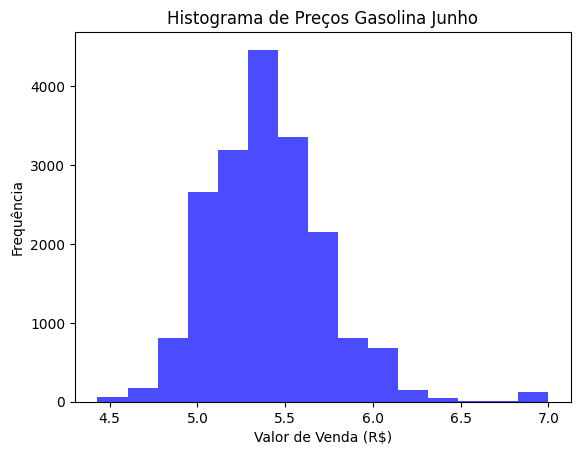

In [ ]:
func_histograma(df_gasolina_junho, 'Gasolina','Junho')

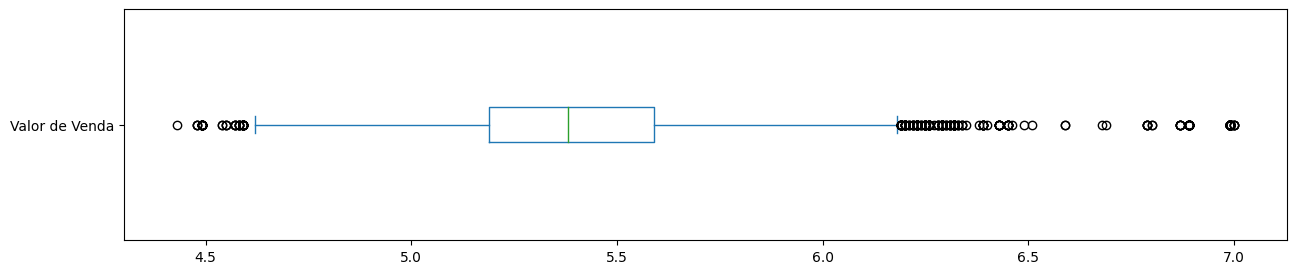

In [ ]:
func_box_plot(df_gasolina_junho)


- A média do preço da gasolina no més de junho foi de 5.39, o desvio padrão foi de 0.33, O menor valor registrado no mês foi de R$4.43, e o maior valor registrado no mês foi de 7.00  
- Primeiro quartil - 25%: 5.19 dos preços coletados da gasolina estão abaixo ou iguais a 5.19
- Segundo quartil - 50%: 5.38 dos preços coletados da gasolina estão abaixo ou iguais a 5.38
- Terceiro quartil - 75%: 5.59 dos preços coletados da gasolina estão abaixo ou iguais a 5.59




- O desvio padrão esta em 0.34, o que indica queo

conjunto de dados está uniforme, e a média está proximo da mediana o que indica que a medida do nível de dispessão é baixo

---

 ```python
 - Convertendo os valores da coluna Valor de Venda de object para float para usar a função describe no preço da gasolina aditivada no mês de junho
```

In [ ]:
df_gasolina_adt_junho = junho[junho['Produto']=='GASOLINA ADITIVADA']
descris_gas_adt_junho = df_gasolina_adt_junho['Valor de Venda'].describe()
descris_gas_adt_junho

count    14417.000000
mean         5.572516
std          0.341832
min          4.590000
25%          5.370000
50%          5.550000
75%          5.780000
max          7.990000
Name: Valor de Venda, dtype: float64

- O desvio padrão esta em 0.34, o que indica queo conjunto de dados está uniforme, e a média está proximo da mediana o que indica que a medida do nível de dispessão é baixo

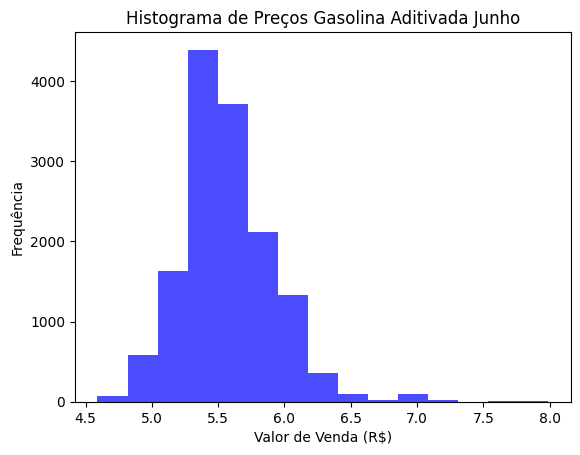

In [ ]:
func_histograma(df_gasolina_adt_junho, 'Gasolina Aditivada','Junho')

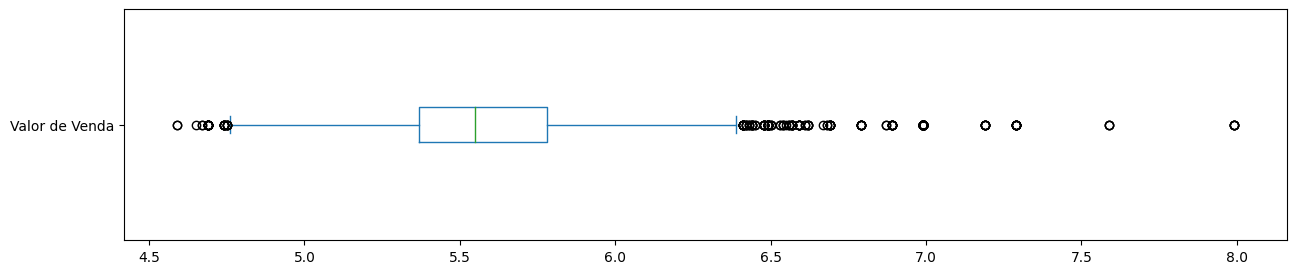

In [ ]:
func_box_plot(df_gasolina_adt_junho)

- A média do preço da gasolina aditivada no més de junho foi de 5.57, o desvio padrão foi de 0.34, O menor valor registrado no mês foi de R$4.59, e o maior valor registrado no mês foi de 7.99  
- Primeiro quartil - 25%: 5.37 dos preços coletados da gasolina estão abaixo ou iguais a 5.37
- Segundo quartil - 50%: 5.55 dos preços coletados da gasolina estão abaixo ou iguais a 5.55
- Terceiro quartil - 75%: 5.78 dos preços coletados da gasolina estão abaixo ou iguais a 5.78

---

```python
- Convertendo os valores da coluna Valor de Venda de object para float para usar a função describe no preço da gasolina no mês de maio
```

In [ ]:
maio['Valor de Venda'] = maio['Valor de Venda'].apply(lambda x: str(x).replace(',','.'))
maio['Valor de Venda'] =maio['Valor de Venda'].astype('float64')
df_gasolina_maio = maio[maio['Produto']=='GASOLINA']
descris_gasolina_maio = df_gasolina_maio['Valor de Venda'].describe()
descris_gasolina_maio

count    22262.000000
mean         5.402364
std          0.385808
min          4.090000
25%          5.130000
50%          5.390000
75%          5.640000
max          7.350000
Name: Valor de Venda, dtype: float64

- O desvio padrão esta em 0.38, o que indica queo conjunto de dados está uniforme, e a média está proximo da mediana o que indica que a medida do nível de dispessão é baixo



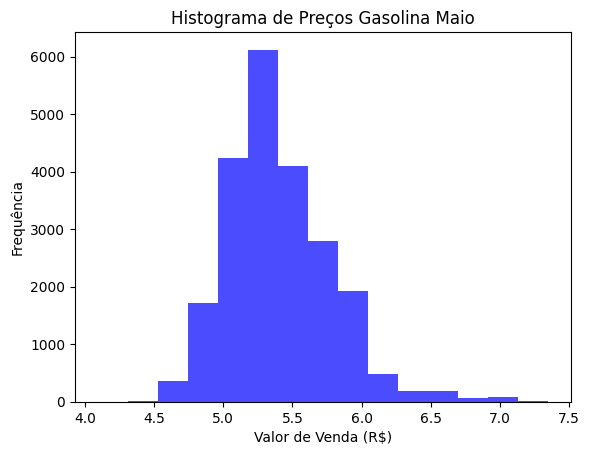

In [ ]:
func_histograma(df_gasolina_maio, 'Gasolina','Maio')

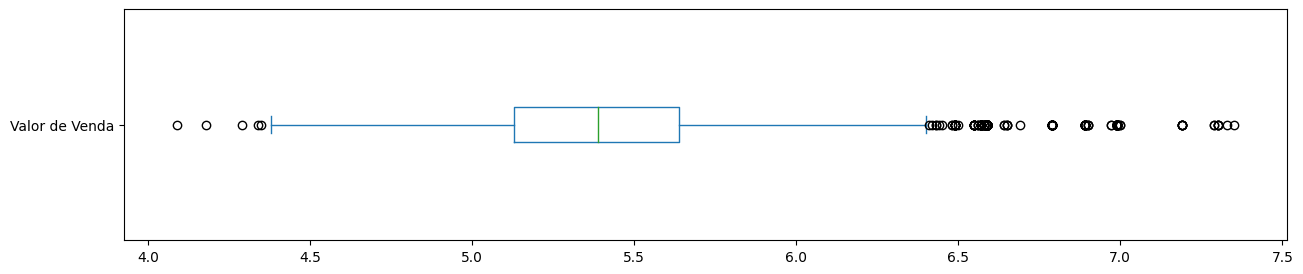

In [ ]:
func_box_plot(df_gasolina_maio)

- A média do preço da gasolina no més de maio foi de 5.40, o desvio padrão foi de 0.38, O menor valor registrado no mês foi de R$4.09, e o maior valor registrado no mês foi de 7.35  
- Primeiro quartil - 25%: 5.13 dos preços coletados da gasolina estão abaixo ou iguais a 5.13
- Segundo quartil - 50%: 5.39 dos preços coletados da gasolina estão abaixo ou iguais a 5.39
- Terceiro quartil - 75%: 5.64 dos preços coletados da gasolina estão abaixo ou iguais a 5.64



---

 ```python
 - Convertendo os valores da coluna Valor de Venda de object para float para usar a função describe no preço da gasolina aditivada no mês de maio
```

In [ ]:
df_gasolina_adt_maio = maio[maio['Produto']=='GASOLINA ADITIVADA']
descris_gas_adt_maio = df_gasolina_adt_maio['Valor de Venda'].describe()
descris_gas_adt_maio

count    17231.000000
mean         5.585725
std          0.391724
min          4.490000
25%          5.290000
50%          5.570000
75%          5.840000
max          7.990000
Name: Valor de Venda, dtype: float64

- O desvio padrão esta em 0.39, o que indica queo conjunto de dados está uniforme, e a média está proximo da mediana o que indica que a medida do nível de dispessão é baixo

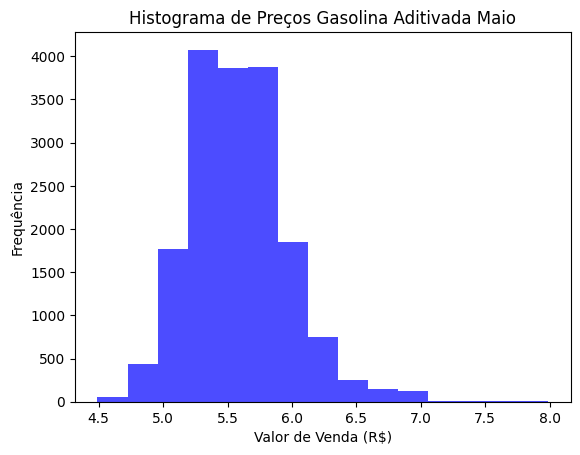

In [ ]:
func_histograma(df_gasolina_adt_maio, 'Gasolina Aditivada','Maio')

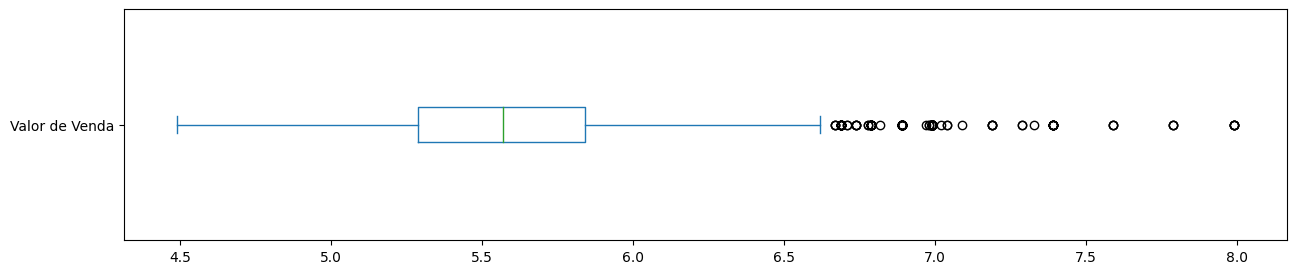

In [ ]:
func_box_plot(df_gasolina_adt_maio)

- A média do preço da gasolina aditivada no més de maio foi de 5.58, o desvio padrão foi de 0.39, O menor valor registrado no mês foi de R$4.49, e o maior valor registrado no mês foi de 7.99  
- Primeiro quartil - 25%: 5.29 dos preços coletados da gasolina estão abaixo ou iguais a 5.29
- Segundo quartil - 50%: 5.57 dos preços coletados da gasolina estão abaixo ou iguais a 5.57
- Terceiro quartil - 75%: 5.84 dos preços coletados da gasolina estão abaixo ou iguais a 5.84

---

#### <font color = blueligh> 2.3. Analisando as informções estatísticas do etanol
Após conhecer a estrutura do dataset, veremos a qualidade dos dados identificando outliers, através de estatística descritiva.

In [ ]:
df_etanol_junho = junho[junho['Produto'] == 'ETANOL']
df_etanol_junho['Valor de Venda'].describe()

count    15938.000000
mean         4.006356
std          0.480796
min          2.970000
25%          3.590000
50%          3.930000
75%          4.370000
max          6.730000
Name: Valor de Venda, dtype: float64

--> em Junho foram registrados 15938 preços de Etanol,com 226 valores diferentes
o preço mais comum foi 3,69 ele foi registrado 1090 vezes

In [ ]:
df_etanol_maio = maio[maio['Produto'] == 'ETANOL']
df_etanol_maio['Valor de Venda'].describe()

count    18997.000000
mean         4.178726
std          0.446702
min          2.990000
25%          3.870000
50%          4.100000
75%          4.490000
max          6.500000
Name: Valor de Venda, dtype: float64

--> em maio foram registrados 18997 preços de etanol,com 237 valores diferentes
o preço mais comum foi 3,99 ele foi registrado 1842 vezes

 ```python
 - Convertendo os valores da coluna Valor de Venda de object para float para usar a função describe no preço da etanol no mês de junho
```

In [ ]:
junho['Valor de Venda'] = junho['Valor de Venda'].apply(lambda x: str(x).replace(',','.'))
junho['Valor de Venda'] =junho['Valor de Venda'].astype('float64')
df_etanol_jun = junho[junho['Produto']=='ETANOL']
descris_etanol_jun = df_etanol_jun['Valor de Venda'].describe()
descris_etanol_jun

count    15938.000000
mean         4.006356
std          0.480796
min          2.970000
25%          3.590000
50%          3.930000
75%          4.370000
max          6.730000
Name: Valor de Venda, dtype: float64

- O desvio padrão esta em 0.48, o que indica queo conjunto de dados está uniforme, e a média está proximo da mediana o que indica que a medida do nível de dispessão é baixo

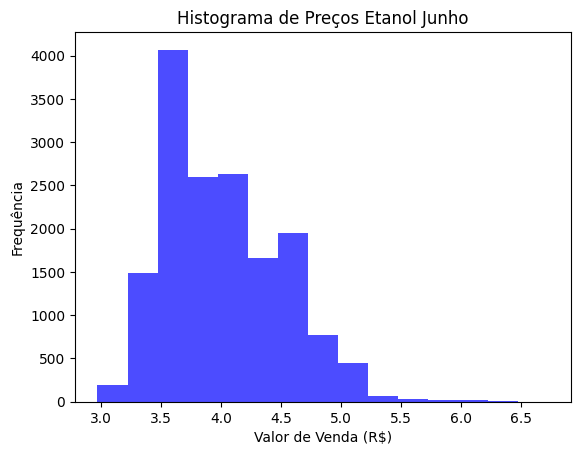

In [ ]:
func_histograma(df_etanol_junho, 'Etanol','Junho')

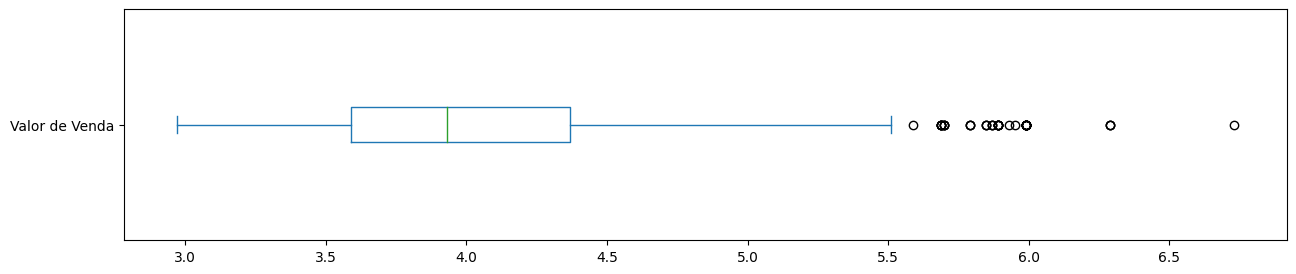

In [ ]:
func_box_plot(df_etanol_junho)

- A média do preço do etanol no més de junho foi de 4.00, o desvio padrão foi de 0.48, O menor valor registrado no mês foi de R$2.97, e o maior valor registrado no mês foi de 6.73  
- Primeiro quartil - 25%: 3.59 dos preços coletados da gasolina estão abaixo ou iguais a 3.59
- Segundo quartil - 50%: 3.93 dos preços coletados da gasolina estão abaixo ou iguais a 3.93
- Terceiro quartil - 75%: 4.37 dos preços coletados da gasolina estão abaixo ou iguais a 4.37

```python
- Convertendo os valores da coluna Valor de Venda de object para float para usar a função describe no preço do etanol no mês de maio
```

In [ ]:
maio['Valor de Venda'] = maio['Valor de Venda'].apply(lambda x: str(x).replace(',','.'))
maio['Valor de Venda'] =maio['Valor de Venda'].astype('float64')
df_etanol_maio = maio[maio['Produto']=='ETANOL']
descris_etanol_maio = df_etanol_maio['Valor de Venda'].describe()
descris_etanol_maio

count    18997.000000
mean         4.178726
std          0.446702
min          2.990000
25%          3.870000
50%          4.100000
75%          4.490000
max          6.500000
Name: Valor de Venda, dtype: float64

- O desvio padrão esta em 0.44, o que indica queo conjunto de dados está uniforme, e a média está proximo da mediana o que indica que a medida do nível de dispessão é baixo

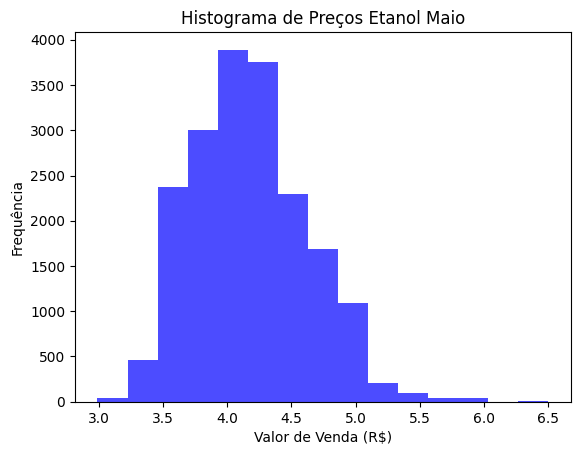

In [ ]:
func_histograma(df_etanol_maio, 'Etanol','Maio')

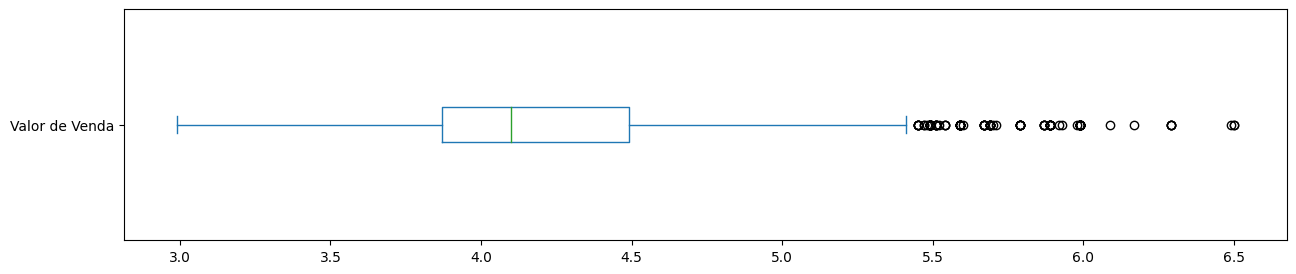

In [ ]:
func_box_plot(df_etanol_maio)

- A média do preço do etanol no més de maio foi de 4.17, o desvio padrão foi de 0.44, O menor valor registrado no mês foi de R$2.99, e o maior valor registrado no mês foi de 6.50  
- Primeiro quartil - 25%: 3.87 dos preços coletados da gasolina estão abaixo ou iguais a 3.87
- Segundo quartil - 50%: 4.10 dos preços coletados da gasolina estão abaixo ou iguais a 4.10
- Terceiro quartil - 75%: 4.49 dos preços coletados da gasolina estão abaixo ou iguais a 4.49

---

## Como se comportaram o preço dos combustíveis durante os dois meses citados? Os valores do etanol e da gasolina e gasolina aditivada tiveram uma tendência de alta ou diminuição?

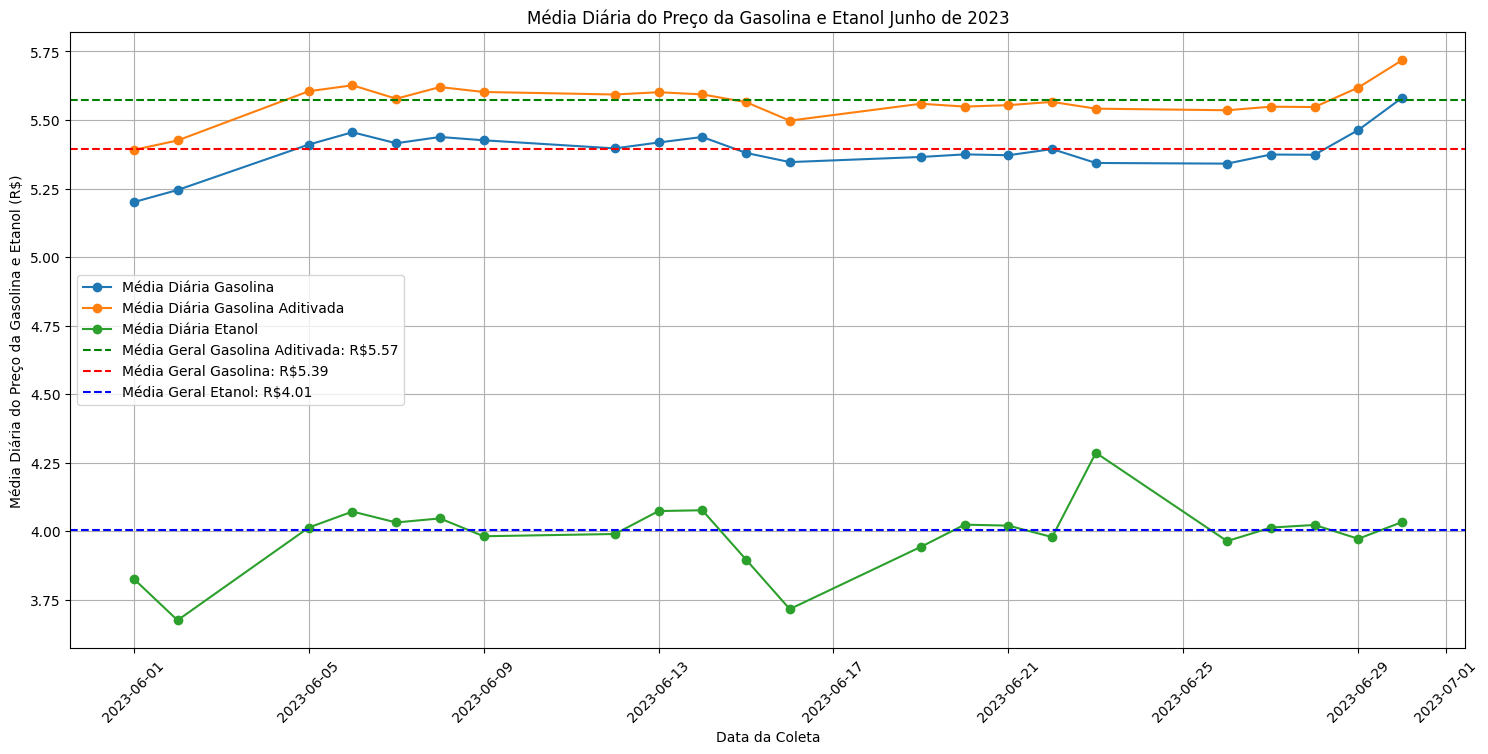

In [ ]:
junho['Data da Coleta'] = pd.to_datetime(junho['Data da Coleta'], format='%d/%m/%Y')

df_etanol_junho = junho[junho['Produto'] == 'ETANOL']
media_diaria_etanol_junho = df_etanol_junho.groupby('Data da Coleta')['Valor de Venda'].mean()

df_gasolina_junho = junho[junho['Produto'] == 'GASOLINA']
media_diaria_gasolina_junho = df_gasolina_junho.groupby('Data da Coleta')['Valor de Venda'].mean()

df_gasolina_adt_junho = junho[junho['Produto'] == 'GASOLINA ADITIVADA']
media_diaria_gasolina_adt_junho = df_gasolina_adt_junho.groupby('Data da Coleta')['Valor de Venda'].mean()

plt.figure(figsize=(18, 8))
plt.plot(media_diaria_gasolina_junho.index, media_diaria_gasolina_junho, marker='o', linestyle='-')

plt.plot(media_diaria_gasolina_adt_junho.index, media_diaria_gasolina_adt_junho, marker='o', linestyle='-')

plt.plot(media_diaria_etanol_junho.index, media_diaria_etanol_junho, marker='o', linestyle='-')

plt.xlabel('Data da Coleta')
plt.ylabel('Média Diária do Preço da Gasolina e Etanol (R$)')
plt.title('Média Diária do Preço da Gasolina e Etanol Junho de 2023')
plt.grid(True)
plt.xticks(rotation=45)
media_geral_gasolina_junho = df_gasolina_junho['Valor de Venda'].mean()
media_diaria_gasolina_adt_junho = df_gasolina_adt_junho['Valor de Venda'].mean()

media_geral_etanol_junho = df_etanol_junho['Valor de Venda'].mean()
media_geral_gasolina = df_gasolina_junho['Valor de Venda'].mean()
media_geral_gasolina_adt = df_gasolina_adt_junho['Valor de Venda'].mean()

media_geral_etanol = df_etanol_junho['Valor de Venda'].mean()
# linha de tendência ao gráfico
plt.axhline(y=media_diaria_gasolina_adt_junho, color='g', linestyle='--', label=f'Média Diária Gasolina Aditivada')

plt.axhline(y=media_geral_gasolina_junho, color='r', linestyle='--', label=f'Média Diária Gasolina')

plt.axhline(y=media_geral_etanol_junho, color='b', linestyle='--', label=f'Média Geral Etanol')

# Adicionar a legenda dentro do gráfico
legenda_fora = plt.legend(['Média Diária Gasolina', 'Média Diária Gasolina Aditivada','Média Diária Etanol',f'Média Geral Gasolina Aditivada: R${media_geral_gasolina_adt:.2f}',f'Média Geral Gasolina: R${media_geral_gasolina:.2f}', f'Média Geral Etanol: R${media_geral_etanol:.2f}'], loc='center left')

plt.show()


- Em Junho teve uma leve tendencia de alta, podemos observar que o preço iniciou abaixo da média e terminou o mês acima da média geral em todos os combustivéis e podemos observar que etanol acompanha a gasolina mais podemos observar melhor no grafico com a correlção dos valores

---

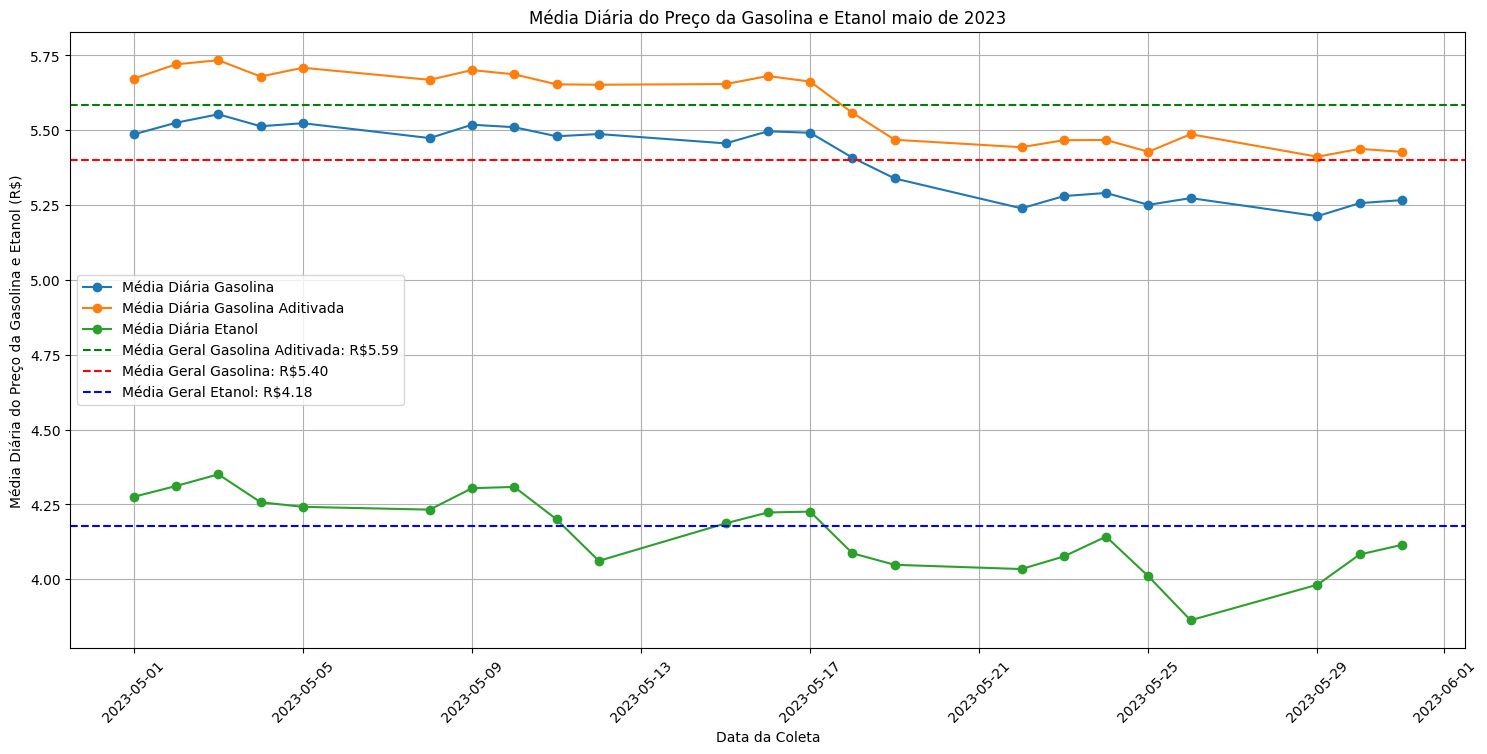

In [ ]:
maio['Data da Coleta'] = pd.to_datetime(maio['Data da Coleta'], format='%d/%m/%Y')

df_etanol_maio = maio[maio['Produto'] == 'ETANOL']
media_diaria_etanol_maio = df_etanol_maio.groupby('Data da Coleta')['Valor de Venda'].mean()

df_gasolina_maio = maio[maio['Produto'] == 'GASOLINA']
media_diaria_gasolina_maio = df_gasolina_maio.groupby('Data da Coleta')['Valor de Venda'].mean()

df_gasolina_adt_maio = maio[maio['Produto'] == 'GASOLINA ADITIVADA']
media_diaria_gasolina_adt_maio = df_gasolina_adt_maio.groupby('Data da Coleta')['Valor de Venda'].mean()

plt.figure(figsize=(18, 8))
plt.plot(media_diaria_gasolina_maio.index, media_diaria_gasolina_maio, marker='o', linestyle='-')

plt.plot(media_diaria_gasolina_adt_maio.index, media_diaria_gasolina_adt_maio, marker='o', linestyle='-')

plt.plot(media_diaria_etanol_maio.index, media_diaria_etanol_maio, marker='o', linestyle='-')

plt.xlabel('Data da Coleta')
plt.ylabel('Média Diária do Preço da Gasolina e Etanol (R$)')
plt.title('Média Diária do Preço da Gasolina e Etanol maio de 2023')
plt.grid(True)
plt.xticks(rotation=45)
media_geral_gasolina_maio = df_gasolina_maio['Valor de Venda'].mean()
media_diaria_gasolina_adt_maio = df_gasolina_adt_maio['Valor de Venda'].mean()

media_geral_etanol_maio = df_etanol_maio['Valor de Venda'].mean()
media_geral_gasolina = df_gasolina_maio['Valor de Venda'].mean()
media_geral_gasolina_adt = df_gasolina_adt_maio['Valor de Venda'].mean()

media_geral_etanol = df_etanol_maio['Valor de Venda'].mean()
# linha de tendência ao gráfico
plt.axhline(y=media_diaria_gasolina_adt_maio, color='g', linestyle='--', label=f'Média Diária Gasolina Aditivada')

plt.axhline(y=media_geral_gasolina_maio, color='r', linestyle='--', label=f'Média Diária Gasolina')

plt.axhline(y=media_geral_etanol_maio, color='b', linestyle='--', label=f'Média Geral Etanol')

# Adicionar a legenda dentro do gráfico
legenda_fora = plt.legend(['Média Diária Gasolina', 'Média Diária Gasolina Aditivada','Média Diária Etanol',f'Média Geral Gasolina Aditivada: R${media_geral_gasolina_adt:.2f}',f'Média Geral Gasolina: R${media_geral_gasolina:.2f}', f'Média Geral Etanol: R${media_geral_etanol:.2f}'], loc='center left')

plt.show()


- Em Maio teve uma leve tendencia de baixa, podemos observar que o preço iniciou acima da média e terminou o mês abaixo da média geral em todos os combustivéis e podemos observar que etanol acompanha a gasolina mais podemos observar melhor no grafico com a correlção dos valores

### Correlação gasolina, gasolina aditivada e tanol no mês Junho

In [ ]:
# Filtrar o dataframe de junho para incluir apenas os registros dos combustíveis
cobustiveis_df = junho[junho['Produto'].isin(['GASOLINA ADITIVADA', 'ETANOL', 'GASOLINA'])]


# Agrupar os dados pela data da coleta e pelo produto e calcular a média dos valores de venda
media_diaria_combustiveis_df = cobustiveis_df.groupby(['Data da Coleta', 'Produto'])['Valor de Venda'].mean().unstack()

# Calcular a correlação entre os combustíveis
correlacao = media_diaria_combustiveis_df['GASOLINA ADITIVADA'].corr(media_diaria_combustiveis_df['ETANOL'])
correlacao2 = media_diaria_combustiveis_df['GASOLINA ADITIVADA'].corr(media_diaria_combustiveis_df['GASOLINA'])
correlacao3 = media_diaria_combustiveis_df['GASOLINA'].corr(media_diaria_combustiveis_df['ETANOL'])


print(f"Correlação entre GASOLINA ADITIVADA e ETANOL: {correlacao}")
print(25*"***")
print(f"Correlação entre GASOLINA ADITIVADA e GASOLINA: {correlacao2}")
print(25*"***")
print(f"Correlação entre GASOLINA e ETANOL: {correlacao3}")
print(25*"***")
media_diaria_combustiveis_df

Correlação entre GASOLINA ADITIVADA e ETANOL: 0.5805285759150302
***************************************************************************
Correlação entre GASOLINA ADITIVADA e GASOLINA: 0.9797443301491561
***************************************************************************
Correlação entre GASOLINA e ETANOL: 0.49652676139450486
***************************************************************************


Produto,ETANOL,GASOLINA,GASOLINA ADITIVADA
Data da Coleta,,,
2023-06-01,3.826259,5.200629,5.391076
2023-06-02,3.675333,5.244667,5.425385
2023-06-05,4.013458,5.410507,5.604951
2023-06-06,4.071839,5.455382,5.626694
2023-06-07,4.032023,5.415266,5.577719
2023-06-08,4.046817,5.438144,5.620181
2023-06-09,3.981739,5.426090,5.602321
2023-06-12,3.989983,5.396446,5.593055
2023-06-13,4.073669,5.418045,5.601391


1. Correlação entre GASOLINA ADITIVADA e ETANOL: 0.58
   Esta correlação indica uma relação moderadamente positiva entre os preços da gasolina aditivada e do etanol. Os valores sugerem que, em média, quando os preços da gasolina aditivada aumentam, os preços do etanol também tendem a aumentar
---
2. Correlação entre GASOLINA ADITIVADA e GASOLINA: 0.97
   Aqui, observamos uma correlação muito forte e positiva entre os preços da gasolina aditivada e da gasolina comum. Isso indica que esses preços dois tipos de gasolina estão altamente relacionados.
---
3. Correlação entre GASOLINA e ETANOL: 0.49
   A correlação entre os preços da gasolina e do etanol é moderada e positiva. Isso sugere que, em média, os preços da gasolina têm uma relação de aumento ou diminuição com os preços do etanol. No entanto, a relação não é tão forte



### Correlação gasolina, gasolina aditivada e tanol no mês maio

In [ ]:
# Filtrar o dataframe de maio para incluir apenas os registros dos combustíveis
cobustiveis_df = maio[maio['Produto'].isin(['GASOLINA ADITIVADA', 'ETANOL', 'GASOLINA'])]

# Agrupar os dados pela data da coleta e pelo produto e calcular a média dos valores de venda
media_diaria_combustiveis_df = cobustiveis_df.groupby(['Data da Coleta', 'Produto'])['Valor de Venda'].mean().unstack()

# Calcular a correlação entre os combustíveis
correlacao4 = media_diaria_combustiveis_df['GASOLINA ADITIVADA'].corr(media_diaria_combustiveis_df['ETANOL'])
correlacao5 = media_diaria_combustiveis_df['GASOLINA ADITIVADA'].corr(media_diaria_combustiveis_df['GASOLINA'])
correlacao6 = media_diaria_combustiveis_df['GASOLINA'].corr(media_diaria_combustiveis_df['ETANOL'])

correlacao6 = media_diaria_combustiveis_df['GASOLINA'].corr(media_diaria_combustiveis_df['ETANOL'])

In [ ]:
print(f"Correlação entre GASOLINA ADITIVADA e ETANOL: {correlacao4}")
print(25*"***")
print(f"Correlação entre GASOLINA ADITIVADA e GASOLINA: {correlacao5}")
print(25*"***")
print(f"Correlação entre GASOLINA e ETANOL: {correlacao6}")
print(25*"***")
media_diaria_combustiveis_df

Correlação entre GASOLINA ADITIVADA e ETANOL: 0.8346884562596616
***************************************************************************
Correlação entre GASOLINA ADITIVADA e GASOLINA: 0.9880017572873078
***************************************************************************
Correlação entre GASOLINA e ETANOL: 0.8406511702958656
***************************************************************************


Produto,ETANOL,GASOLINA,GASOLINA ADITIVADA
Data da Coleta,,,
2023-05-01,4.275692,5.486517,5.672497
2023-05-02,4.311716,5.525288,5.720500
2023-05-03,4.350719,5.553485,5.734016
2023-05-04,4.257511,5.513592,5.679676
2023-05-05,4.242093,5.523692,5.708973
2023-05-08,4.232767,5.473995,5.668641
2023-05-09,4.304372,5.518595,5.701174
2023-05-10,4.308635,5.510410,5.686959
2023-05-11,4.200355,5.480055,5.653517


1. Correlação entre GASOLINA ADITIVADA e ETANOL: 0.83
Há uma correlação forte e positiva entre os preços da gasolina aditivada e do etanol. Isso sugere que, em geral, quando os preços da gasolina aditivada aumentam, os preços do etanol também tendem a subir.
---
2. Correlação entre GASOLINA ADITIVADA e GASOLINA: 0.99
Observamos uma correlação quase perfeita entre os preços da gasolina aditivada e da gasolina comum. Esses dois tipos de gasolina têm uma relação extremamente próxima em termos de variação do preços.
---
3. Correlação entre GASOLINA e ETANOL: 0.84
Há uma correlação forte e positiva entre os preços da gasolina e do etanol. Isso indica que, em média, os preços da gasolina estão intimamente ligados aos preços do etanol, com tendências semelhantes de aumento ou diminuição.









---


#### <font color = blueligh>  Analisando as informções de média de valores por estado e região dos combustiveis
- Faremos uma análise de média de valores em relação aos estados brasileiros e suas regiões.

- o dataset br_uf traz os dados e localização dos estados brasileiros por cordenadas
    - usaremos o head(), para poder vizualizar como está organizado o dataset

In [ ]:
# trazendo a geobr que para gerar os mapas
br_uf = geobr.read_state()
br_uf.head()

/usr/local/lib/python3.10/dist-packages/geopandas/array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
/usr/local/lib/python3.10/dist-packages/geopandas/array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
/usr/local/lib/python3.10/dist-packages/geopandas/array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
/usr/local/lib/python3.10/dist-packages/geopandas/array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometri

,code_state,abbrev_state,name_state,code_region,name_region,geometry
0,11.0,RO,Rondônia,1.0,Norte,"MULTIPOLYGON (((-63.32721 -7.97672, -62.86662 ..."
1,12.0,AC,Acre,1.0,Norte,"MULTIPOLYGON (((-73.18253 -7.33550, -72.58477 ..."
2,13.0,AM,Amazonas,1.0,Norte,"MULTIPOLYGON (((-67.32609 2.02971, -67.31682 2..."
3,14.0,RR,Roraima,1.0,Norte,"MULTIPOLYGON (((-60.20051 5.26434, -60.19273 5..."
4,15.0,PA,Pará,1.0,Norte,"MULTIPOLYGON (((-54.95431 2.58369, -54.93542 2..."


--> Aqui usaremos o dataset Junho, e traremos para ajustar os dados para a pesquisa e analise que sera feita em relação aos estados

In [ ]:
# df_inicial sera usado para selecionar o necessário
df_ajuste = junho
df_ajuste

,Regiao - Sigla,Estado - Sigla,Municipio,Produto,Data da Coleta,Valor de Venda,Unidade de Medida,Bandeira
0,NE,BA,IRECE,ETANOL,2023-06-01,4.31,R$ / litro,VIBRA ENERGIA
1,NE,BA,IRECE,GASOLINA,2023-06-01,5.39,R$ / litro,VIBRA ENERGIA
2,NE,BA,SIMOES FILHO,ETANOL,2023-06-01,4.19,R$ / litro,VIBRA ENERGIA
3,NE,BA,SIMOES FILHO,GASOLINA ADITIVADA,2023-06-01,5.36,R$ / litro,VIBRA ENERGIA
4,NE,BA,SIMOES FILHO,GASOLINA,2023-06-01,5.29,R$ / litro,VIBRA ENERGIA
...,...,...,...,...,...,...,...,...
49036,NE,BA,CAMACARI,GASOLINA,2023-06-30,5.64,R$ / litro,BRANCA
49037,NE,BA,CAMACARI,ETANOL,2023-06-30,4.44,R$ / litro,BRANCA
49038,NE,BA,CAMACARI,GASOLINA ADITIVADA,2023-06-30,5.64,R$ / litro,BRANCA
49039,NE,BA,CAMACARI,GASOLINA,2023-06-30,5.64,R$ / litro,BRANCA


In [ ]:
# renomear as colunas de acordo com o br_uf para que o merge aconteça
df_ajuste.rename(columns={'Estado - Sigla':'abbrev_state'},inplace= True)
df_ajuste.rename(columns ={'Regiao - Sigla': 'name_region'},inplace =True)
df_ajuste

,name_region,abbrev_state,Municipio,Produto,Data da Coleta,Valor de Venda,Unidade de Medida,Bandeira
0,NE,BA,IRECE,ETANOL,2023-06-01,4.31,R$ / litro,VIBRA ENERGIA
1,NE,BA,IRECE,GASOLINA,2023-06-01,5.39,R$ / litro,VIBRA ENERGIA
2,NE,BA,SIMOES FILHO,ETANOL,2023-06-01,4.19,R$ / litro,VIBRA ENERGIA
3,NE,BA,SIMOES FILHO,GASOLINA ADITIVADA,2023-06-01,5.36,R$ / litro,VIBRA ENERGIA
4,NE,BA,SIMOES FILHO,GASOLINA,2023-06-01,5.29,R$ / litro,VIBRA ENERGIA
...,...,...,...,...,...,...,...,...
49036,NE,BA,CAMACARI,GASOLINA,2023-06-30,5.64,R$ / litro,BRANCA
49037,NE,BA,CAMACARI,ETANOL,2023-06-30,4.44,R$ / litro,BRANCA
49038,NE,BA,CAMACARI,GASOLINA ADITIVADA,2023-06-30,5.64,R$ / litro,BRANCA
49039,NE,BA,CAMACARI,GASOLINA,2023-06-30,5.64,R$ / litro,BRANCA


In [ ]:
df_ajuste['name_region'].replace(['N','S','SE','NE','CO'],['Norte','Sul','Sudeste','Nordeste','Centro Oeste'], inplace =True)
df_ajuste['name_region'].unique()

array(['Nordeste', 'Sudeste', 'Centro Oeste', 'Norte', 'Sul'],
      dtype=object)

#### Funções utilizadas para um melhor reaproveitamento do código


--> Função func_agrupa_media
   - função usada para agrupar o valor da venda e calcular a média, usada para filtrar a média por estado e por região, usada nas três categorias de combutivel.

In [ ]:
#funçao agrupa media por estado
def func_agrupa_media (df,coluna_agrup,nome_coluna):
  df_agrupa_media= df.groupby(coluna_agrup)['Valor de Venda'].mean()
  df_agrupa_media= df_agrupa_media.rename (nome_coluna)
  return df_agrupa_media

--> Função func_print_ordem
   - função usada para printar a média de valores em ordem decrescente de estados, nas três categorias de combustivel.

In [ ]:
#funçao para printar a ordem de valores de media
def func_print_ordem(df,var_combust,mes):
  df_ordem = df.sort_values(ascending=False)
  print (f'Os estados estão ordenados pela média mais alta no valor do {var_combust} no mês de {mes}')
  for i, (uf, valor) in enumerate(df_ordem.items(), start=1):
     print ('*'*50)
     print (f'o estado do {uf} é o {i}º com média de R$ {valor:.2f} /litro')

--> Função func_print_ordem_reg
   - função usada para printar a média de valores em ordem decrescente de região, nas três categorias de combustivel.

In [ ]:
#funçao para gerar o print com a ordem por regiao
def func_print_ordem_reg(df,var_combust,mes):
  df_ordem_reg = df_etanol_reg_jun.sort_values(ascending=False)
  print (f'Os estados estão ordenados pela média mais alta no valor do {var_combust} no mês de {mes}')
  for i, (rg, valor) in enumerate(df_ordem_reg.items(), start=1):
       print ('*'*50)
       print (f'A região do {rg} é a {i}º com média de {valor:.2f}')

--> Função func_gerar_mapa
   - função usada para plotar o mapa do Brasil, e colorir de acordo com a média de valores em ordem decrescente de estados e de região, nas três categorias de combustivel.

In [ ]:
# funçao para gerar o mapa
def func_gerar_mapa(df_mapa, coluna_valor, titulo_map):
  f, ax = plt.subplots()
  f.set_size_inches(10, 10)
  df_mapa.plot(
    ax=ax,                              # Axis de destino do gráfico
    column=coluna_valor,  # Coluna com os valores usados para colorir o mapa
    edgecolor='0.8',
    cmap="Blues",                      # Mapa de cores                  # Cor dos contornos
    linewidth=0.25,                     # Espessura dos contornos
  )

# Adiciona escala Colorbar (https://stackoverflow.com/a/36080553)
# Cria um Axis usado para fazer o Colorbar
  cax = f.add_axes(
      [
        0.82,    # posicao x (entre 0.0 e 1.0)
        0.18,    # posicao y (entre 0.0 e 1.0)
        0.03,    # largura x
        0.40,    # altura y
    ]
  )

  sm = plt.cm.ScalarMappable(
    cmap="Blues",               # Usa o mesmo cmap do mapa
    norm=plt.Normalize(
        vmin=br_uf_mapa[coluna_valor].min(),  # Valor mínimo
        vmax=br_uf_mapa[coluna_valor].max(),  # Valor máximo
    ),
  )
  # Põe o Axis com Colorbar na mesma figura do mapa
  f.colorbar(
      sm,
      cax=cax,
    # Formata a escala do Colorbar
       format=ticker.FuncFormatter(lambda x, pos: f"{x*1: >10,.1f} R$/litro"),
  )
  #plt.legend(['Média Diária Gasolina'],loc='upper left')
  ax.set_title(
    titulo_map,
    fontdict={"fontsize": 20},
  )
  f.text(
    0.15,                  # Posição x
    0.20,                  # Posição y
    "Fonte:ANP(2023)."  # Texto
  )
  ax.axis("off")          # Rem



#### Filtrando Etanol no mês de Junho

In [ ]:
# filtrando o dataset e agrupando os dados do etanol no mês de Junho
df_etanol_junho = df_ajuste[df_ajuste['Produto'] == 'ETANOL']
df_etanol_junho['Valor de Venda'].describe()


count    15938.000000
mean         4.006356
std          0.480796
min          2.970000
25%          3.590000
50%          3.930000
75%          4.370000
max          6.730000
Name: Valor de Venda, dtype: float64

--> Usando a função func_agrupa_media, para obter as médias do valor do etanol por estado no mes de Junho

In [ ]:
#  chmando a função e agrupando por estado a media do preço do etanol
df_etanol_uf_jun = func_agrupa_media(df_etanol_junho,'abbrev_state','med_etan_uf_ju')
df_etanol_uf_jun

abbrev_state
AC    4.776875
AL    4.529078
AM    4.532800
AP    5.186667
BA    4.380951
CE    4.550434
DF    3.833770
ES    4.428102
GO    3.755829
MA    4.634930
MG    3.737021
MS    3.893391
MT    3.462817
PA    4.650543
PB    4.085798
PE    4.288970
PI    4.316517
PR    4.033835
RJ    4.331780
RN    4.664607
RO    4.923444
RR    5.065000
RS    4.805658
SC    4.623317
SE    4.398241
SP    3.628249
TO    4.530261
Name: med_etan_uf_ju, dtype: float64

--> Fazendo um merge com br_uf através da sigla dos estados para obter a localização e plotar no mapa

In [ ]:
# merge da df_etanol_uf_jun com br_uf
br_uf_mapa= br_uf.merge(df_etanol_uf_jun, on ='abbrev_state')
br_uf_mapa.head()

,code_state,abbrev_state,name_state,code_region,name_region,geometry,med_etan_uf_ju
0,11.0,RO,Rondônia,1.0,Norte,"MULTIPOLYGON (((-63.32721 -7.97672, -62.86662 ...",4.923444
1,12.0,AC,Acre,1.0,Norte,"MULTIPOLYGON (((-73.18253 -7.33550, -72.58477 ...",4.776875
2,13.0,AM,Amazonas,1.0,Norte,"MULTIPOLYGON (((-67.32609 2.02971, -67.31682 2...",4.532800
3,14.0,RR,Roraima,1.0,Norte,"MULTIPOLYGON (((-60.20051 5.26434, -60.19273 5...",5.065000
4,15.0,PA,Pará,1.0,Norte,"MULTIPOLYGON (((-54.95431 2.58369, -54.93542 2...",4.650543


--> criado o dataset para plotar o mapa com as médias e os estados, será chamada a função para que o mapa seja plotado

/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/usr/local/lib/python3.10/dist-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/usr/local/lib/python3.10/dist-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


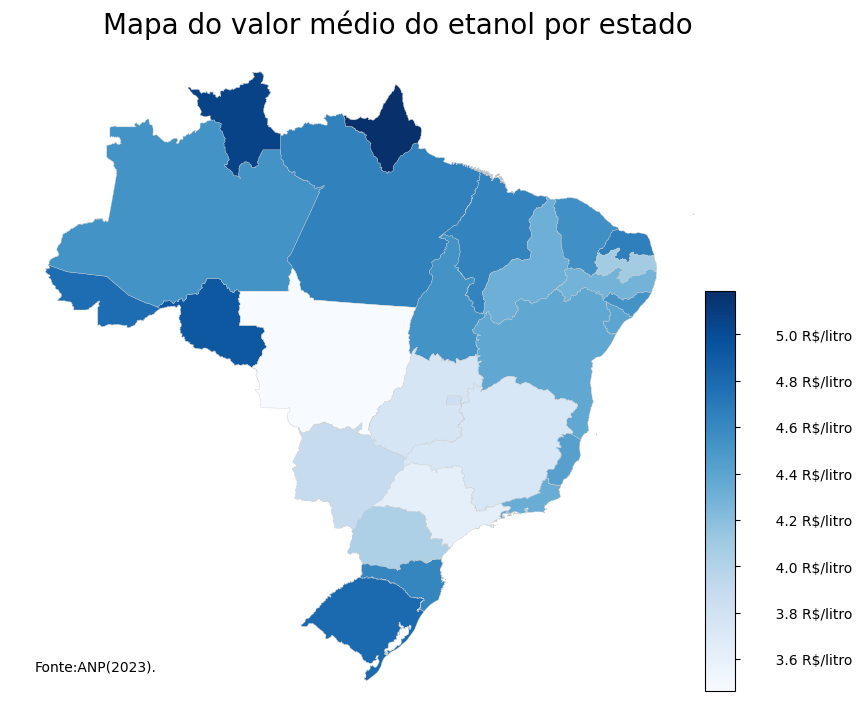

In [ ]:
# chamando a funçao para gerar o grafico do etanol por estado
func_gerar_mapa(br_uf_mapa,'med_etan_uf_ju','Mapa do valor médio do etanol por estado')

--> De acordo com o que foi observado no mapa, sera chamado a função para printar as informções em ordem decrescente dos estados

In [ ]:
# print da ordem decrescente de valor de media chama função
func_print_ordem(df_etanol_uf_jun,'Etanol','Junho')

Os estados estão ordenados pela média mais alta no valor do Etanol no mês de Junho
**************************************************
o estado do AP é o 1º com média de R$ 5.19 /litro
**************************************************
o estado do RR é o 2º com média de R$ 5.07 /litro
**************************************************
o estado do RO é o 3º com média de R$ 4.92 /litro
**************************************************
o estado do RS é o 4º com média de R$ 4.81 /litro
**************************************************
o estado do AC é o 5º com média de R$ 4.78 /litro
**************************************************
o estado do RN é o 6º com média de R$ 4.66 /litro
**************************************************
o estado do PA é o 7º com média de R$ 4.65 /litro
**************************************************
o estado do MA é o 8º com média de R$ 4.63 /litro
**************************************************
o estado do SC é o 9º com média de R$ 4.62 /litro
********

--> Aqui selecionamos os cinco estados com média no valor do litro do etanol, mais alto de acordo com os dados em Junho
  - Amapa esta em primeiro com um valor de R$ 5,19 por litro;

  - Roraima esta em segundo  com um valor de R$ 5,07 por litro;

  - Rondonia esta em terceiro com um valor de R$ 4,92 por litro;

  - Rio Grande do sul esta em quarto com um valor de R$ 4,81 por litro

  - Acre esta em quinto com um valor de R$ 4,78 por litro



--> Agrupando o etanol por média por região

In [ ]:
# chamando a funçao e agrupando por regiao
df_etanol_reg_jun = func_agrupa_media(df_etanol_junho,'name_region','med_etan_reg_ju')
df_etanol_reg_jun

name_region
Centro Oeste    3.735889
Nordeste        4.410514
Norte           4.651818
Sudeste         3.787070
Sul             4.348599
Name: med_etan_reg_ju, dtype: float64

--> Fazendo um merge com br_uf através do nome da região para obter a localização e plotar no mapa

In [ ]:
# merge da df_etanol_uf_jun com br_uf
br_uf_mapa= br_uf.merge(df_etanol_reg_jun, on ='name_region')
br_uf_mapa.head()

,code_state,abbrev_state,name_state,code_region,name_region,geometry,med_etan_reg_ju
0,11.0,RO,Rondônia,1.0,Norte,"MULTIPOLYGON (((-63.32721 -7.97672, -62.86662 ...",4.651818
1,12.0,AC,Acre,1.0,Norte,"MULTIPOLYGON (((-73.18253 -7.33550, -72.58477 ...",4.651818
2,13.0,AM,Amazonas,1.0,Norte,"MULTIPOLYGON (((-67.32609 2.02971, -67.31682 2...",4.651818
3,14.0,RR,Roraima,1.0,Norte,"MULTIPOLYGON (((-60.20051 5.26434, -60.19273 5...",4.651818
4,15.0,PA,Pará,1.0,Norte,"MULTIPOLYGON (((-54.95431 2.58369, -54.93542 2...",4.651818


--> Criado o dataset para plotar o mapa com as médias e as regiões, será chamada a função para que o mapa seja plotado

/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/usr/local/lib/python3.10/dist-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/usr/local/lib/python3.10/dist-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


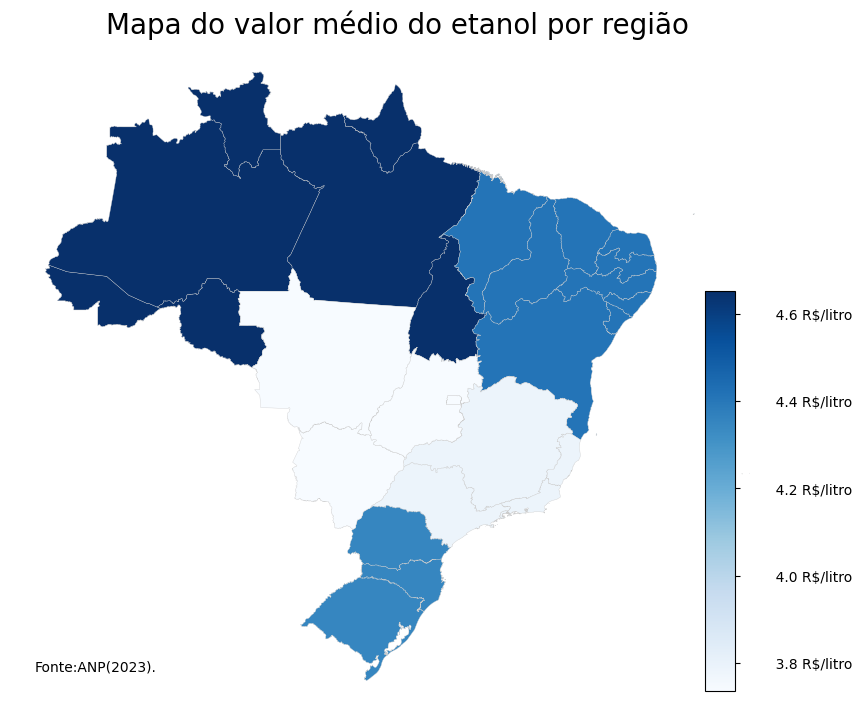

In [ ]:
# chamando a funçao para gerar o grafico do etanol por regiao
func_gerar_mapa(br_uf_mapa,'med_etan_reg_ju','Mapa do valor médio do etanol por região')

--> De acordo com o que foi observado no mapa, sera chamado a função para printar as informções em ordem decrescente das regiões

In [ ]:
func_print_ordem_reg(df_etanol_reg_jun,'Etanol','Junho')

Os estados estão ordenados pela média mais alta no valor do Etanol no mês de Junho
**************************************************
A região do Norte é a 1º com média de 4.65
**************************************************
A região do Nordeste é a 2º com média de 4.41
**************************************************
A região do Sul é a 3º com média de 4.35
**************************************************
A região do Sudeste é a 4º com média de 3.79
**************************************************
A região do Centro Oeste é a 5º com média de 3.74


- Aqui começa gasolina no mes junho........